In [91]:
!pip install simpletransformers


In [0]:
#from tokenizers import AddedToken as AddedTokenFast

In [0]:

from simpletransformers.classification import ClassificationModel


# Create a TransformerModel
#model = ClassificationModel('bert_model', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda=True)
model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args={'reprocess_input_data': True, 'overwrite_output_dir': True},use_cuda = False)

In [0]:
## path to combined Kaggle+Stock News dataset -- 1500 sentences
file_path = '/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotated_sample_for_training/combined_benchmark.csv'

In [0]:
## from tutorial from Kaggle financial news dataset

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

df = pd.read_csv(file_path,encoding='latin-1', usecols=['label','text'])

In [97]:
df

,label,text
0,0,Why not subscribe to the magazine ?
1,-1,"Tornio Works employs 2,300 of whom more than 1..."
2,1,"The move is aimed at boosting sales , cost-eff..."
3,0,"As a result of the merger , the largest profes..."
4,-1,18 March 2010 A leakage in the gypsum pond was...
...,...,...
1456,-1,Strategist Jim Paulsen: The economy may soon l...
1457,-1,Steel stocks jump on Trump's tariff threat. Pr...
1458,1,E-cigarette maker Juul is raising $150 million...
1459,1,Here's why FANG stocks will get stronger even ...


In [0]:
#df = df.rename(columns={'neutral':'sentiment','According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .':'statement'})

In [99]:
df.describe()

,label
count,1461.000000
mean,-0.006160
std,0.818847
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [100]:
df.drop_duplicates(subset=['text'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1461 non-null   int64 
 1   text    1461 non-null   object
dtypes: int64(1), object(1)
memory usage: 34.2+ KB


In [101]:
df.describe()

,label
count,1461.000000
mean,-0.006160
std,0.818847
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


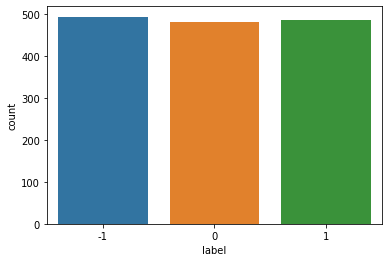

In [102]:
sns.countplot(df.label)

In [103]:
df['label'].value_counts()

-1    494
 1    485
 0    482
Name: label, dtype: int64

In [104]:
train,eva = train_test_split(df,test_size = 0.2,stratify=df['label']) 
# stratify to make sure train and test splits have same label distribution
train['label'].value_counts()

-1    395
 1    388
 0    385
Name: label, dtype: int64

In [105]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
train['label'] = train['label'].apply(making_label)
eva['label'] = eva['label'].apply(making_label)
print(train.shape)

(1168, 2)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
train_df = pd.DataFrame({
    'text': train['text'].replace(r'\n', ' ', regex=True),
    'label': train['label']
})

eval_df = pd.DataFrame({
    'text': eva['text'].replace(r'\n', ' ', regex=True),
    'label': eva['label']
})

In [107]:
train_df

,text,label
1245,The Economy and Stocks: A Big Disconnect. Alth...,1
1132,GE CEO says company needs to reduce debt 'thou...,1
1445,Trump rally: Stocks put 2017 in the record boo...,0
1394,Why Russia Can't Afford Another Cold War. On M...,1
268,"A total of 1,800,000 stock options were issued...",2
...,...,...
99,The maritime administration said the ships had...,1
1119,Ahold says on course to meet U.S. online sales...,0
285,The second variant offers complete final finis...,2
110,"In the second quarter of 2010 , Raute 's net l...",0


In [108]:
model.train_model(train_df) ## takes estimated 2:39 hours for 8000+ examples without GPU
#estimated time 1:35 hours with GPU  
#-- too long, a workaround -- undersample of majority class + oversample of minority classes


## on 1500 examples combined benchmark set -> estimated time on GPU is 23 minutes

## weird -- Transformer cannot take -1 as label. raises error "target is out of bounds". resuming to [0,1,2] for [1,-1,0]

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:251: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


Running loss: 0.589088

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.391575


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [109]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:669: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [110]:
result

{'eval_loss': 0.5199298395498378, 'mcc': 0.67137230641552}

In [111]:
model_outputs

array([[ 1.67084777e+00, -1.75868225e+00,  1.84988931e-01],
       [ 9.18877184e-01, -1.06325555e+00,  4.08692539e-01],
       [-2.66071856e-01,  1.55902410e+00, -1.17086899e+00],
       [-4.46388036e-01,  2.08092666e+00, -1.42547178e+00],
       [ 4.12090927e-01,  1.44197559e+00, -1.64473367e+00],
       [ 7.68388152e-01, -2.03541517e+00,  1.26720786e+00],
       [-1.91017985e-01,  1.67690790e+00, -1.32114744e+00],
       [ 5.07834673e-01, -1.87795997e+00,  1.82023180e+00],
       [-1.84116319e-01,  1.50909173e+00, -1.07874131e+00],
       [ 3.91376495e-01, -1.87931132e+00,  1.79292059e+00],
       [ 1.92940855e+00, -4.59241837e-01, -1.42109978e+00],
       [ 2.92309165e-01, -1.96661556e+00,  1.94571304e+00],
       [-2.16935113e-01,  2.24930668e+00, -1.59340477e+00],
       [ 1.40657473e+00, -9.93456483e-01, -5.40166259e-01],
       [-4.77380335e-01,  2.53025293e+00, -1.55966544e+00],
       [ 2.11333275e+00, -1.25392365e+00, -7.85051823e-01],
       [ 1.15310624e-01, -1.84101856e+00

In [0]:
#wrong_predictions

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [0]:
true = eval_df['label'].tolist()
predicted = lst

In [115]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[59, 24, 14],
       [ 7, 91,  1],
       [14,  5, 78]])

In [116]:
print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

## previously 0.92 with 2800+ examples each class on Kaggle dataset

### combined benchmark result --> 0.78 accuracy and 0.77 f1

              precision    recall  f1-score   support

    positive       0.74      0.61      0.67        97
     neutral       0.76      0.92      0.83        99
    negative       0.84      0.80      0.82        97

    accuracy                           0.78       293
   macro avg       0.78      0.78      0.77       293
weighted avg       0.78      0.78      0.77       293



In [117]:
sklearn.metrics.accuracy_score(true,predicted)

0.7781569965870307

In [118]:
def get_result(statement):
    result = model.predict([statement])
    pos = np.where(result[1][0] == np.amax(result[1][0]))
    pos = int(pos[0])
    sentiment_dict = {0:'positive',1:'negative',2:'neutral'}
    print(sentiment_dict[pos])
    return pos





## neutral statement
get_result("According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .")


neutral


2

In [119]:
## positive statement
get_result("According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales .")



neutral


2

In [120]:
## negative statement
get_result('Sales in Finland decreased by 2.0 % , and international sales decreased by 9.3 % in terms of euros , and by 15.1 % in terms of local currencies .')



negative


1

In [121]:
## test on other headlines
get_result('Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic')


negative


1

In [0]:
headline = 'Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic'
hl2 = 'Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope'
hl3 = 'Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus'
hl4 = 'Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report'

In [123]:
sentences = [headline, hl2, hl3, hl4]
for s in sentences:
    print(s)
    print(get_result(s))

Fed’s Powell to urge Congress to ‘do everything’ it can to help those suffering amid pandemic



negative
1
Dow rises more than 900 points, books its biggest daily advance in 6 weeks on coronavirus vaccine hope



positive
0
Trump Says He’s Taking Hydroxychloroquine to Prevent Getting Coronavirus



negative
1
Nasdaq plans to toughen rules that could make it harder for Chinese companies to list on its exchange: report



negative
1


In [0]:
fp_hl1 = 'Alberta slashed its economic growth forecast'
fp_hl2 = "Crude price crisis hits Alberta's growth forecast"
fp_hl3 = 'Exploding demand for pot fuelling a jobs boom'

In [125]:
sentences = [fp_hl1, fp_hl2, fp_hl3]  ## performing less good on unseen data

for s in sentences:
    print(s)
    print(get_result(s))

Alberta slashed its economic growth forecast



negative
1
Crude price crisis hits Alberta's growth forecast



negative
1
Exploding demand for pot fuelling a jobs boom



negative
1


In [0]:
## checkpoint file: /content/outputs/



In [0]:
### further finetuning with econ-indicator-specific labels

Now try loading the Headlines-trained model and finetune with sentence pair

In [0]:
## using only title and aspect to predict sentiment

# gdp_train_df = pd.DataFrame({
#     'text_a': gdp_train['title'],
#     'text_b': gdp_train['aspect'],
#     'labels': gdp_train['label']
# })

# gdp_eval_df = pd.DataFrame({
#     'text_a': gdp_eva['title'],
#     'text_b': gdp_eva['aspect'],
#     'labels': gdp_eva['label']
# })

# text_a is headline, text_b is description
gdp_train_df = pd.DataFrame({
    'text_a': gdp_train['title'],
    'text_b': gdp_train['description'],
    'labels': gdp_train['label']
})

gdp_eval_df = pd.DataFrame({
    'text_a': gdp_eva['title'],
    'text_b': gdp_eva['description'],
    'labels': gdp_eva['label']
})

In [0]:
model_headlines_oversampled = ClassificationModel('bert', 'outputs/checkpoint-146-epoch-1/') #reloads the stage1 finetuned model

Now have a larger GDP-annotation set to put into training

In [0]:
gdp_full_annotations_file = '/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotations_bnn_cbc/annotated_GDP_bnn&CBC.csv'

gdp_full_df = pd.read_csv(gdp_full_annotations_file, usecols = ['title','description','title_desc_sent_1','publishedAt'])

In [130]:
gdp_full_df.head()

,description,publishedAt,title,title_desc_sent_1
0,"Hamilton has lost roughly 8,500 jobs during th...",2020-05-13,Hamilton economy in 'extraordinary pain' but w...,-1
1,PBO says it's possible federal debt will hit $...,2020-05-13,Federal deficit likely to be higher than $252 ...,-1
2,"Already strained by COVID-19, institutions cou...",2020-05-07,Post-secondary schools face rough autumn if pa...,0
3,Prime Minister Justin Trudeau has promised fin...,2020-05-06,"May and Blanchet declare the oilpatch 'dead,' ...",-1
4,The high number of COVID-19 cases in Montreal ...,2020-05-04,Setback to Montreal retail reopening shows roc...,-1


In [131]:
len(gdp_full_df)

130

In [132]:
gdp_full_df['title_desc_sent_1'].value_counts()

-1    55
 0    43
 1    32
Name: title_desc_sent_1, dtype: int64

In [0]:
# add one more column to combine title+description
gdp_full_df['title_desc'] = gdp_full_df['title'] + ". " + gdp_full_df['description']

Also oversample the two-source gdp annotated set

In [134]:
# make the other two minority classes to have same size with majority class "-1"(negative)

gdp_negative_rows = gdp_full_df[gdp_full_df['title_desc_sent_1'] == -1]
print(len(gdp_negative_rows))
gdp_neutral_rows = gdp_full_df[gdp_full_df['title_desc_sent_1'] == 0]
gdp_positive_rows = gdp_full_df[gdp_full_df['title_desc_sent_1'] == 1]


neutral_gdp_resampled = gdp_neutral_rows.sample(frac=len(gdp_negative_rows)/len(gdp_neutral_rows),random_state=42,replace=True)

positive_gdp_resampled = gdp_positive_rows.sample(frac=len(gdp_negative_rows)/len(gdp_positive_rows),random_state=42,replace=True)

55


In [135]:
len(positive_gdp_resampled)

55

In [0]:
gdp_df_oversampled = pd.concat([positive_gdp_resampled,gdp_negative_rows,neutral_gdp_resampled])

In [137]:
len(gdp_df_oversampled)

165

In [138]:
gdp_df_oversampled.head()

,description,publishedAt,title,title_desc_sent_1,title_desc
50,"In New York, Dow Jones industrial average up 4...",2019-11-27,North American markets reach new record highs ...,1,North American markets reach new record highs ...
107,Canadian gross domestic product grew at the fa...,2018-12-21,Canada's GDP grows at fastest pace in 5 months...,1,Canada's GDP grows at fastest pace in 5 months...
123,U.S. President Donald Trump predicted data on ...,2018-07-27,Trump predicts data will show U.S. economy in ...,1,Trump predicts data will show U.S. economy in ...
80,Canadian firms among many investing billions i...,2019-07-17,Companies look to cash in on out-of-this-world...,1,Companies look to cash in on out-of-this-world...
61,That’s despite new revenues including 3% tax o...,2019-09-30,Liberals promises new spending and four more y...,1,Liberals promises new spending and four more y...


In [0]:
gdp_df_oversampled.to_csv('/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotations_bnn_cbc/gdp_df_oversampled.csv')

In [0]:
## also create fix train and eval set for simpleTransformer and Flair model performance comparison? 
from sklearn.model_selection import train_test_split
gdp_full_train,gdp_full_eva = train_test_split(gdp_df_oversampled,test_size = 0.2, random_state = 42)

In [0]:
gdp_full_train.to_csv('/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotations_bnn_cbc/gdp_train_oversampled.csv')
gdp_full_eva.to_csv('/content/drive/My Drive/Colab Notebooks/capstone_betterdwelling/annotations_bnn_cbc/gdp_eva_oversampled.csv')

In [0]:
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2)
#gdp_full_train,gdp_full_eva = train_test_split(gdp_full_df,test_size = 0.2, random_state = 42)
#gdp_train,gdp_eva = train_test_split(gdp_df,test_size = 0.2, random_state = 0)

In [143]:
# 0,1,2 : positive,negative
def making_label(st):
    if(st==1):
        return 0
    elif(st==0):
        return 2
    else:
        return 1
    
gdp_full_train['label'] = gdp_full_train['title_desc_sent_1'].apply(making_label)
gdp_full_eva['label'] = gdp_full_eva['title_desc_sent_1'].apply(making_label)
print(gdp_full_train.shape)

(132, 6)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [0]:
# text_a is headline, text_b is description
gdp_full_train_df = pd.DataFrame({
    'text_a': gdp_full_train['title'],
    'text_b': gdp_full_train['description'],
    'labels': gdp_full_train['label']
})

gdp_full_eval_df = pd.DataFrame({
    'text_a': gdp_full_eva['title'],
    'text_b': gdp_full_eva['description'],
    'labels': gdp_full_eva['label']
})

In [145]:
gdp_full_eval_df

,text_a,text_b,labels
63,Canadian industry is 'addicted to fossil fuels...,Goal isn't to come up with something political...,2
62,The candidates for Regina‚ÄíLewvan and where t...,Candidates gathered for panel discussion Friday,2
8,P.E.I. announces $4.7M to tackle potato surplu...,This will help to ensure no product is lost so...,2
0,Hamilton economy in 'extraordinary pain' but w...,"Hamilton has lost roughly 8,500 jobs during th...",1
98,U.S. fourth-quarter growth pace revised down t...,U.S. economic growth cooled by more than initi...,1
122,Oil drives Canada's fastest economic growth sp...,Canada’s economy grew at the fastest pace in a...,0
27,British immigration overhaul takes aim at 'che...,"Changes likely to impact service, farming and ...",2
124,Trump claims victory as GDP grows at fastest p...,President Donald Trump said the U.S. economy i...,0
105,Forget about getting fresh trade data — the U....,Canada's statistics agency will stop releasing...,1
62,The candidates for Regina‚ÄíLewvan and where t...,Candidates gathered for panel discussion Friday,2


In [0]:
##model_headlines_oversampled = ClassificationModel('bert', 'outputs/checkpoint-862-epoch-1/',use_cuda=False) #reload 

In [147]:


model_headlines_oversampled.train_model(gdp_full_train_df, eval_df=gdp_full_eval_df, args={'reprocess_input_data': True, 'overwrite_output_dir': True, 
                                                                     'num_train_epochs':3,"do_lower_case": True,
                                                                     "max_seq_length": 128})

Running loss: 0.242989


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


Running loss: 0.067916


Running loss: 0.098159

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


Running loss: 0.037448



In [148]:
result, model_outputs, wrong_predictions = model_headlines_oversampled.eval_model(gdp_full_eval_df)

In [0]:
## see if accuracy is getting better 

In [150]:
model_outputs

array([[-1.5400664 , -0.4623817 ,  2.3609595 ],
       [-0.72606593, -1.4410634 ,  2.5262177 ],
       [-0.7113535 , -1.568286  ,  2.6972773 ],
       [-2.080051  ,  2.8373754 , -0.14804326],
       [-1.3712074 ,  3.2386196 , -1.7992803 ],
       [ 3.8733459 , -2.211739  , -1.8160026 ],
       [-1.2015109 , -0.7855657 ,  2.3135085 ],
       [ 3.7922888 , -2.186825  , -1.9033514 ],
       [-1.6903952 ,  2.918782  , -0.71902686],
       [-0.72606593, -1.4410634 ,  2.5262177 ],
       [ 1.7341179 , -1.0096934 , -0.6338839 ],
       [-1.425964  ,  3.1530354 , -1.8060853 ],
       [ 3.8065453 , -2.0090177 , -1.9826738 ],
       [-1.9913106 ,  3.2676742 , -0.79253024],
       [ 3.8267117 , -1.9539917 , -1.7970713 ],
       [ 3.8065453 , -2.0090177 , -1.9826738 ],
       [-0.72606593, -1.4410634 ,  2.5262177 ],
       [-2.2826712 ,  2.1666353 ,  0.9481768 ],
       [-1.8835529 ,  3.3130338 , -1.0158118 ],
       [-0.5855334 , -0.98222965,  1.870225  ],
       [-2.126948  ,  3.0301886 , -0.316

In [0]:
lst = []
for arr in model_outputs:
    lst.append(np.argmax(arr))

In [152]:
lst

[2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1]

In [0]:
true = gdp_full_eval_df['labels'].tolist()
predicted = lst

In [154]:
true

[2,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1]

In [155]:
import sklearn
mat = sklearn.metrics.confusion_matrix(true , predicted)
mat

array([[ 9,  0,  2],
       [ 0, 11,  0],
       [ 0,  3,  8]])

In [156]:
## (oversampling on Kaggle set )alright, not too bad. 0.73 accuracy and 0.72 f1. all three classes have decent f1-score
## versus single Bloomberg source performance -- 0.79 accuracy and 0.55 f1(oversampling )

#### oversampling both Kaggle and GDP set

## wow 0.82 accuracy and 0.82 f1-- target reached! (before using combined benchmark)

###### combined benchmark
# even better 0.85 accuracy and 0.85 f1

print(sklearn.metrics.classification_report(true,predicted,target_names=['positive','neutral','negative']))

              precision    recall  f1-score   support

    positive       1.00      0.82      0.90        11
     neutral       0.79      1.00      0.88        11
    negative       0.80      0.73      0.76        11

    accuracy                           0.85        33
   macro avg       0.86      0.85      0.85        33
weighted avg       0.86      0.85      0.85        33



In [159]:
sklearn.metrics.accuracy_score(true,predicted)

0.8484848484848485

In [160]:
for i, arr in enumerate(model_outputs):
    print(gdp_full_eval_df.iloc[i]['text_a'])
    print(arr)
    print("true label: ", gdp_full_eval_df.iloc[i]['labels'])
    print("argmax predicted label: ",np.argmax(arr))

Canadian industry is 'addicted to fossil fuels,' but the Green Party can change that, says Elizabeth May
[-1.5400664 -0.4623817  2.3609595]
true label:  2
argmax predicted label:  2
The candidates for Regina‚ÄíLewvan and where they stand on the issues
[-0.72606593 -1.4410634   2.5262177 ]
true label:  2
argmax predicted label:  2
P.E.I. announces $4.7M to tackle potato surplus related to COVID-19 market conditions
[-0.7113535 -1.568286   2.6972773]
true label:  2
argmax predicted label:  2
Hamilton economy in 'extraordinary pain' but will see strong comeback next year: report
[-2.080051    2.8373754  -0.14804326]
true label:  1
argmax predicted label:  1
U.S. fourth-quarter growth pace revised down to 2.2% from 2.6%
[-1.3712074  3.2386196 -1.7992803]
true label:  1
argmax predicted label:  1
Oil drives Canada's fastest economic growth spurt in a year
[ 3.8733459 -2.211739  -1.8160026]
true label:  0
argmax predicted label:  0
British immigration overhaul takes aim at 'cheap labour from